## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. Udacity assigned a project based on understand the results of an A/B test run by an e-commerce website. Scenario is a company has developed a new web page in order to try and increase the number of users.

Goal is to find that the new wevsite is performing well or not as compared to the old one. I performed different steps with the data set 
in order to acheive our aim. Steps involved were removing duplicate user ids , page assignment , hypothesis testing and standard statistical tests and multiple regression modelling.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

b. Use the cell below to find the number of rows in the dataset.

In [3]:
#df.info()
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


c. The number of unique users in the dataset.

In [4]:
len(df.user_id.unique().tolist())

290584

d. The proportion of users converted.

In [5]:
(df['converted'].value_counts()/df['converted'].count())*100

0    88.034081
1    11.965919
Name: converted, dtype: float64

Converted users proportion is 11.6%

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

From above we can see that there are 0 null values in the dataset.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates()

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
con_user = float(df2.query('converted == 1')['user_id'].nunique())
prob_con = con_user/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(prob_con))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
con_controluser = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_user =float(df2.query('group == "control"')['user_id'].nunique())
control_prob_con = con_controluser /control_user
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(control_prob_con))

 Given that an individual was in the control group, the probability they converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
con_treatmentuser = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treatment_user =float(df2.query('group == "treatment"')['user_id'].nunique())
treatment_prob_con = con_treatmentuser /treatment_user
print(" Given that an individual was in the treatment group, the probability they converted is {0:.2%}".format(treatment_prob_con))

 Given that an individual was in the treatment group, the probability they converted is 11.88%


d. What is the probability that an individual received the new page?

In [17]:
new_page_user = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
new_page_prob = new_page_user/float(df2.shape[0])
print("The probability that an individual received the new page is {0:.2%}".format(new_page_prob))

The probability that an individual received the new page is 50.01%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probability of an individual converting regardless of the page they receive is 11.96%.


If the individual was in the control group, the probability they converted is 12.04%.


If the individual was in the treatment group, the probability they converted is 11.88%.


By the result provided above, we can say thay both the pages have similar performance. So we cannot state that one page leads to more hits.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothese, H0 : p_new - p_old <= 0  
Alternative hypothese, H1 : p_new - p_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean() # Same 
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean() 

0.11861537402794027

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11933312223797789

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
sim_value = new_page_converted.mean() - old_page_converted.mean()
sim_value

-0.00071774821003761646

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    npc_mean = new_page_converted.mean()
    old_page_converted = np.random.binomial(1, p_old, n_old)
    opc_mean = old_page_converted.mean()
    p_diffs.append(npc_mean - opc_mean)

In [26]:
p_diffs = np.array(p_diffs)
pd_mean = p_diffs.mean()
pd_mean

-2.8865163289686381e-05

In [27]:
p_diffs.std()

0.0012064496842609277

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

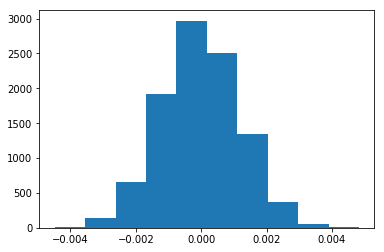

In [28]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
treatment_conv = df2.query('group == "treatment"')['converted'].mean()
control_conv = df2.query('group == "control"')['converted'].mean()
obs_diff = treatment_conv - control_conv
obs_diff

-0.0015790565976871451

In [30]:
# diference
p_d = (p_diffs > obs_diff).mean()
p_d

0.89970000000000006

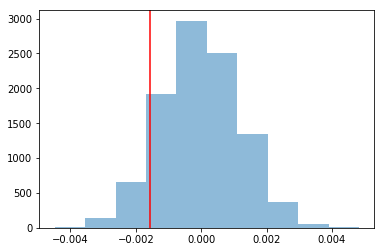

In [31]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(x=obs_diff, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Here we calculate the p-value for calculating the probablity of the statistics. We can see both the pages performs equally as there is no much of a change. Hence we can conclude that null hypothesis is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

control_conv,treatment_conv,n_old,n_new


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.1203863045004612, 0.11880724790277405, 145274, 145310)

In [33]:
control_convt = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
treatment_convt = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([control_convt, treatment_convt], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [36]:
from scipy.stats import norm

norm.cdf(z_score), norm.ppf(1-(0.05/2)) # Z score significance , calculating critical value at 95% confidence level //

(0.90505831275902449, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

1. Z-score : 1.3109241 is less than the critical value of 1.959963. Hence we can conclude it as null hypothesis.
2. We find that old pages performs a bit well.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2= df2.join(pd.get_dummies(df2['landing_page']))
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:               8.085e-06
Time:                        23:04:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p-value (ab_page) = 0.19 

The vlaue differs because a high p-value for ab_page in the regression model means that there is no correlation between the landing page type and the conversion rate. This implies that p_new is equal to p_old, which is the null hypothesis of a two tailed test:

Ho: p_new = p_old


H1: p_new != p_old

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Time (timestamp	variable) might put an influence. Time period can be found when the usage is high.

Disadavantage is that the addition wmill make the model more complex, also addition of variable in the model will conclude to covariance. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries = pd.read_csv('countries.csv')
df3 = df2.merge(countries, on ='user_id', how='left')

df3.head(50)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,CA
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,CA


In [41]:
countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['UK'])

In [43]:
df3['intercept'] = 1

In [44]:
#Country and converted , UK and new page as baseline
log_regn = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','CA']])
result = log_regn.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:               2.326e-05
Time:                        23:04:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
US            -0.0099      0.013     -0.743      0.458      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.075      -0.106       0.005
==============================================================================
"""

In [45]:
np.exp(-0.0150),np.exp(0.0099),np.exp(-0.0506)

(0.98511193960306265, 1.0099491671175422, 0.95065885803307082)

In [46]:
1/np.exp(-0.0150),np.exp(0.0099),np.exp(-0.0506)

(1.0151130646157189, 1.0099491671175422, 0.95065885803307082)

Result:
 
For every unit of ab_page decrease, conversion will be 1.5% more likely to happen.
 
US : each unit increase, convert is 0.9% to happen.

CA : each unit increase, convert is 5.1% most likely to happen.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
df3['US_ab_page'] = df3['ab_page']* df3['US']
df3['CA_ab_page'] = df3['ab_page']* df3['CA']

In [48]:
log_reg_1 = sm.Logit(df3['converted'], df3[['intercept','ab_page','US_ab_page','CA_ab_page','US','CA']])
result_1 = log_reg_1.fit()
result_1.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Jul 2019   Pseudo R-squ.:               3.485e-05
Time:                        23:04:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US_ab_page    -0.0314      0.027     -1.182      0.237      -0.084       0.021
CA_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US             0.0058      0.019      0.307      0.759      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
==============================================================================
"""

In [49]:
1/np.exp(result_1.params)

intercept     7.331806
ab_page       0.989224
US_ab_page    1.031930
CA_ab_page    1.081428
US            0.994250
CA            1.011854
dtype: float64

For a unit increase in a_page, conversion is 1.08 % more likely to happen

We can imply that coefficient of variable "US_ab_page" and "CA_ab_page" are different from the coefficient of ab_page itself.

Conversion is 1.03 times likely to happen for US and ab page users than UK and ab page users.

Conversion is 1.08 times likely to happen for CA and ab page users than UK and ab page users.

Convert is 0.5 % likely to happen for the users in US than UK.

Convert is 1.01 % likely to happen for the users in US than UK

0